Refer: [Kalman and Bayesian Filters in Python - Chapter 1: The g-h Filter](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kf_book import book_plots
from kf_book.gh_internal import plot_g_h_results

In [4]:
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx * dt)
        dx = dx

        # update step
        residual = z - x_pred  # 残差
        dx = dx + h * residual / dt
        x_est = x_pred + g * residual
        results.append(x_est)

    return np.array(results)



## 1.6 Exercise: create measurement function

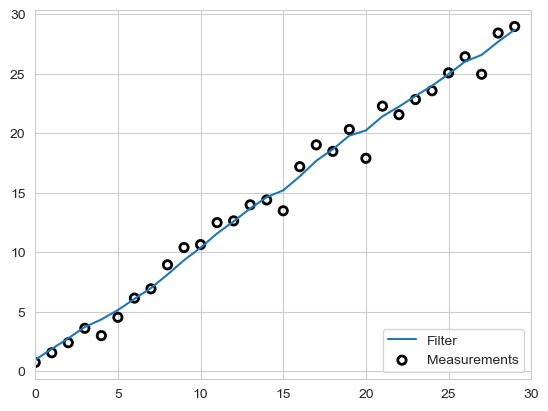

In [5]:
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx * i + np.random.randn() * noise_factor for i in range(count)]


measurements = gen_data(0, 1, 30, 1)  # 观测值 (带噪声)
data = g_h_filter(measurements, x0=0., dx=1., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements, data)

## 1.7 Exercise: Bad Initial Conditions

使用 gen_data 和 g_h_filter 过滤从 5 开始的 100 个数据点，导数为 2，噪声缩放因子为 10，并使用 g=0.2 和 h=0.02。将 x 的初始猜测设置为 100。

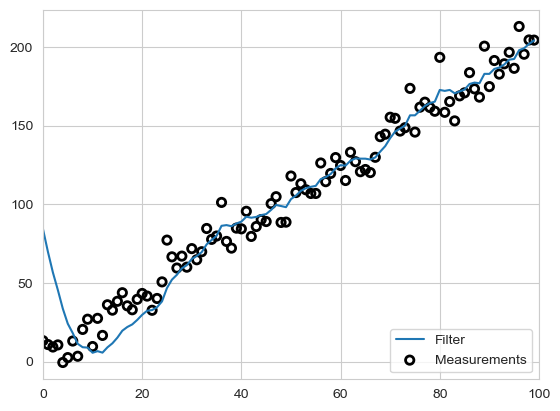

In [6]:
zs = gen_data(x0=5, dx=2, count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100, dx=2, dt=1, g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

在稳定测量数据之前会“rings”。 “振铃”是指信号以正弦型模式对数据进行过冲和下冲。这是滤波器中非常常见的现象，滤波器设计中的大量工作致力于最大限度地减少振铃。

## 1.8 Exercise: Extreme Noise

重新运行相同的测试，但这次使用噪声系数 100。通过将初始条件从 100 更改为 5 来消除初始条件振铃

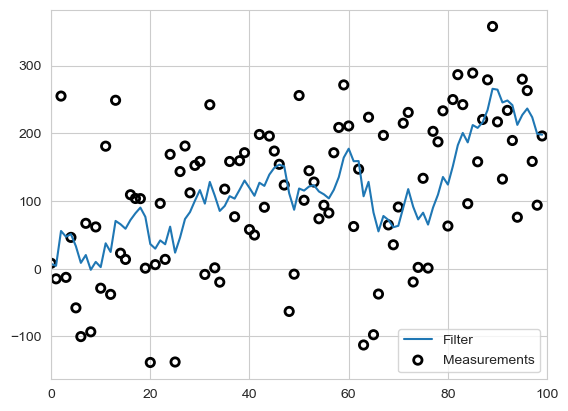

In [7]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=2., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

我们可以看到，也许滤波后的信号变化小于噪声信号，但它远离直线。如果我们只绘制过滤后的结果，没有人会猜到信号从 5 开始，并在每个时间步增加 2。虽然在某些地方滤波器似乎确实减少了噪音，但在其他地方它似乎出现过冲和下冲。

## 1.9 Exercise: The Effect of Acceleration

编写一个新的数据生成函数，为每个数据点添加恒定的加速因子。换句话说，在计算每个数据点时增加 dx，以便速度 (dx) 不断增加。将噪声设置为 0、g = 0:2 和 h = 0:02 并使用plot_g_h_results 或您自己的例程绘制结果。尝试不同的加速度和时间步长。解释你所看到的。

In [2]:
def gen_data(x0, dx, count, noise_factor, accel=0.):
    zs = []
    for i in range(count):
        zs.append(x0 + accel * (i ** 2) / 2 + dx * i + np.random.randn() * noise_factor)
        dx += accel

    return zs

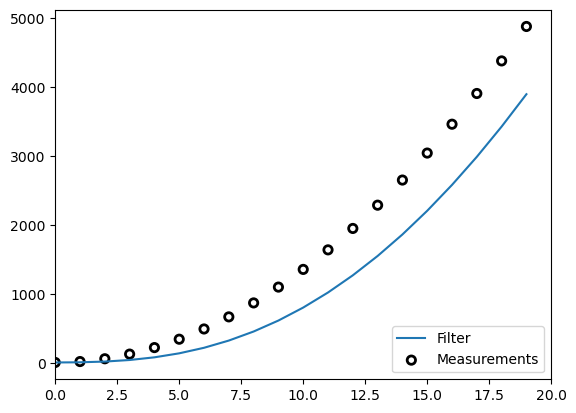

In [5]:
predictions = []
zs = gen_data(x0=10, dx=0, count=20, noise_factor=0, accel=9)
data = g_h_filter(data=zs, x0=10, dx=0, g=0.2, h=0.02)
plot_g_h_results(zs, data)

## 1.10 Exercise: Varying $g$

让noise_factor=50 和dx=5。绘制 g = 0.1, 0.4, 0.8 的结果。

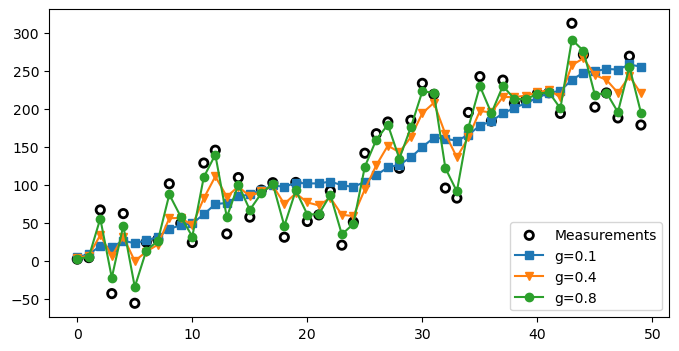

In [6]:
np.random.seed(21)
zs = gen_data(x0=5, dx=5, count=50, noise_factor=50)
data1 = g_h_filter(data=zs, x0=0, dx=5, dt=1, g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=0, dx=5, dt=1, g=0.4, h=0.01)
data3 = g_h_filter(data=zs, x0=0, dx=5, dt=1, g=0.8, h=0.01)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(zs, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', marker='o', c='C2')
    plt.legend(loc=4)

(6.0, 20.0)

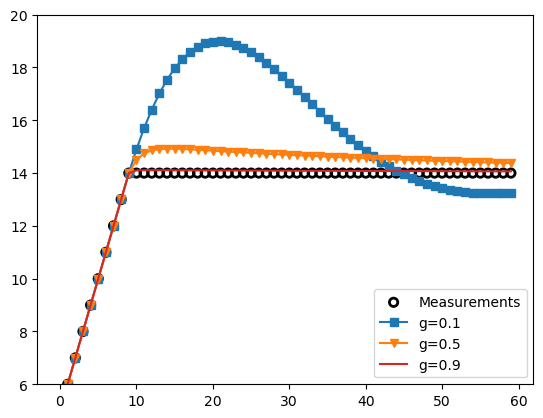

In [8]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in range(50):
    zs.append(14)
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.5, h=0.01)
data3 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.9, h=0.01)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
book_plots.plot_filter(data2, label='g=0.5', marker='v', c='C1')
book_plots.plot_filter(data3, label='g=0.9', c='C3')
plt.legend(loc=4)
plt.ylim([6, 20])


(6.0, 18.0)

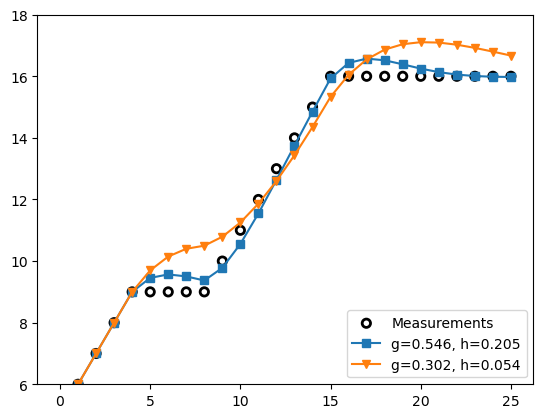

In [10]:
zs = [5, 6, 7, 8, 9, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.302, h=.054)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.546, h=.205)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data2, label='g=0.546, h=0.205', marker='s', c='C0')
book_plots.plot_filter(data1, label='g=0.302, h=0.054', marker='v', c='C1')
plt.legend(loc=4)
plt.ylim([6, 18])

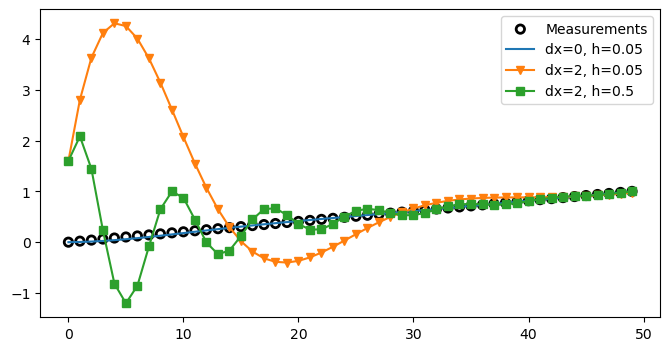

In [15]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

plt.figure(figsize=(8, 4))
book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5', marker='s', c='C2')
plt.legend(loc=1)
plt.show()

## 1.14 Tracking a Train

首先，我们来模拟一下没有过滤器的情况。我们假设火车当前行驶在 23 公里处，并以 15 m/s 的速度行驶。我们可以将其编码为

In [16]:
pos = 23 * 1000  # 位移
vel = 15  # 速度


def compute_new_position(pos, vel, dt=1):
    return pos + vel * dt


我们可以通过向该位置添加一些随机噪声来模拟测量。这里我们的误差是 500m

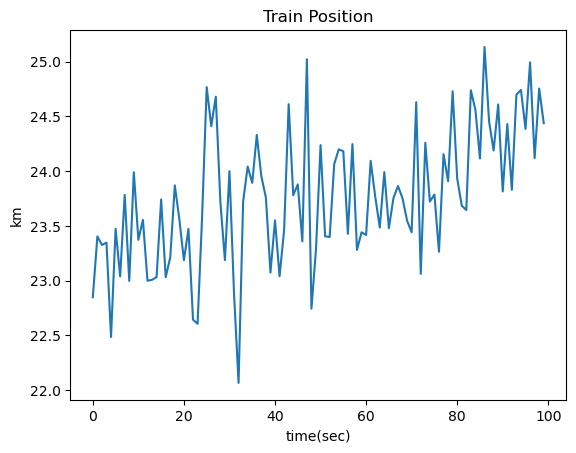

In [18]:
def measure_position(pos):
    return pos + np.random.randn() * 500


def gen_train_data(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))

    return np.asarray(zs)


pos, vel = 23 * 1000, 15
zs = gen_train_data(pos, vel, 100)
plt.plot(zs / 1000)
book_plots.set_labels('Train Position', 'time(sec)', 'km')

我们知道测量结果非常不准确，所以我们根本不想给它们太大的权重。为此，我们需要选择一个非常小的 g。我们也知道火车不能快速加速或减速，所以我们也想要一个非常小的h。

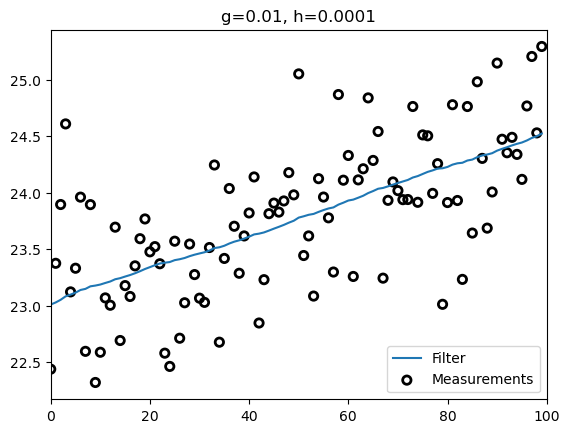

In [19]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs / 1000., data / 1000., 'g=0.01, h=0.0001')

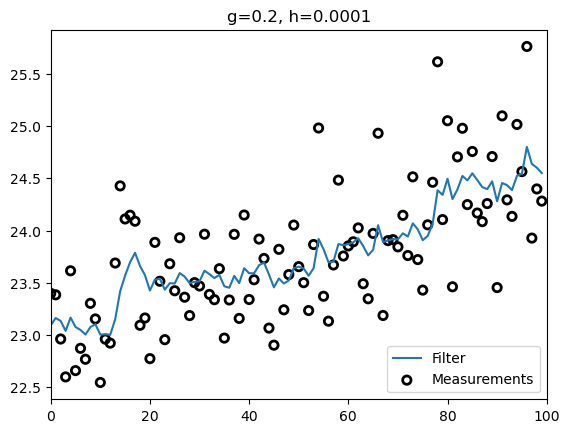

In [22]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.2, h=0.0001)  # 增大 g
plot_g_h_results(zs / 1000., data / 1000., 'g=0.2, h=0.0001')

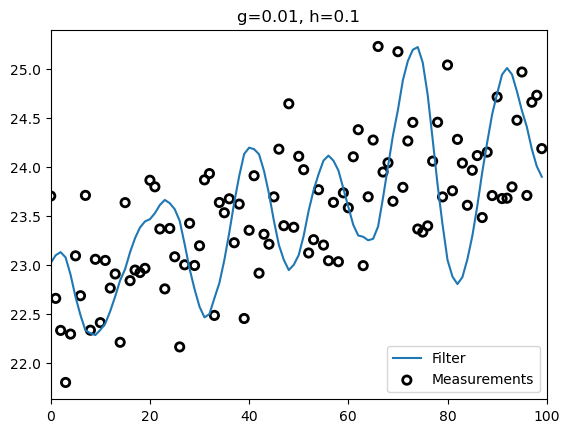

In [23]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.1)  # 增大 h
plot_g_h_results(zs / 1000., data / 1000., 'g=0.01, h=0.1')

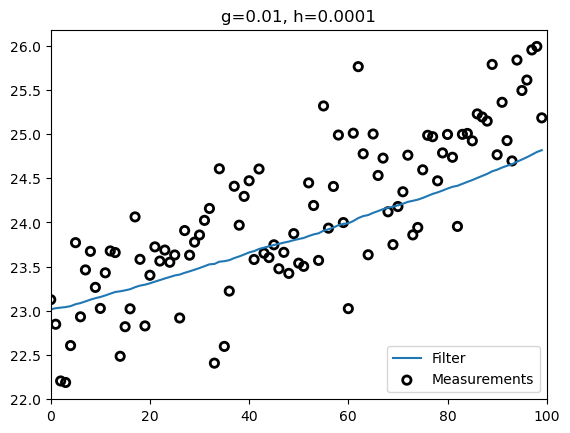

In [31]:
# 添加加速度
def gen_train_data_with_acc(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        vel += 0.2
        zs.append(measure_position(pos))

    return np.asarray(zs)


zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.0001)
plot_g_h_results(zs / 1000., data / 1000., 'g=0.01, h=0.0001')

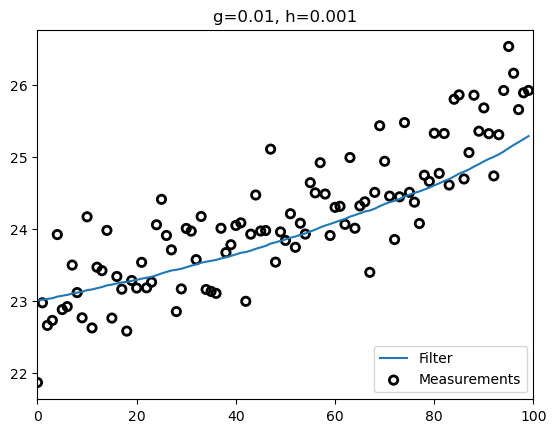

In [32]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.001)
plot_g_h_results(zs / 1000., data / 1000., 'g=0.01, h=0.001')

## 1.15 g-h Filters with FilterPy

In [33]:
from filterpy.gh import GHFilter

f = GHFilter(x=0, dx=0, dt=1, g=0.8, h=0.2)
f.update(z=1.2)

(0.96, 0.24)

In [34]:
print(f.x, f.dx)

0.96 0.24


In [35]:
print(f.update(z=2.1, g=.85, h=.15))

(1.965, 0.375)


In [38]:
print(f.batch_filter([3., 4., 5.]))

[[1.965  0.375 ]
 [2.868  0.507 ]
 [3.875  0.632 ]
 [4.9014 0.7306]]


In [39]:
# 过滤多个变量
x_0 = np.array([1., 10., 100.])
dx_0 = np.array([10., 12., .2])

f_air = GHFilter(x=x_0, dx=dx_0, dt=1., g=.8, h=.2)
f_air.update(z=np.array((2., 11., 102.)))
print(' x =', f_air.x)
print('dx =', f_air.dx)

 x = [  3.8   13.2  101.64]
dx = [8.2  9.8  0.56]
